# 데이터

## 데이터 준비

In [10]:
import numpy as np

X = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0])
y = np.array([5.0, 6.0, 7.0, 8.0, 9.0, 10.0])

print(X.shape, y.shape)

(6,) (6,)


## 데이터 시각화
- 산점도를 그려 데이터의 분포 확인

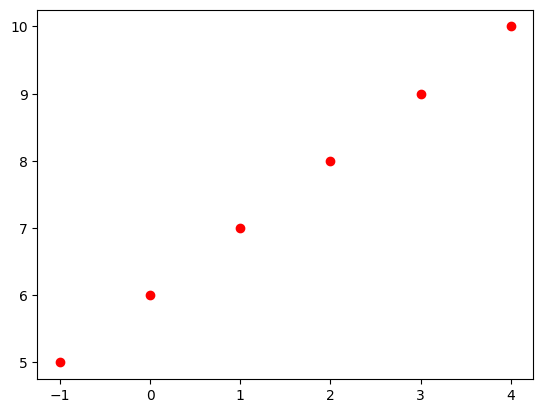

In [2]:
import matplotlib.pyplot as plt

plt.plot(X, y, 'ro')
plt.show()

## 모델 만들기

In [3]:
# 케라스를 사용해서 Unit(Dense)이 1개인 모델을 만든다.

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(1, input_shape=(1,)),
])

model.summary()

2023-01-02 10:38:39.364600: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


2023-01-02 10:40:22.472255: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### 모델의 컴파일
- keras는 모델의 학습 전에 컴파일, 손실함수와 옵티마이저, 메트릭스를 설정

In [4]:
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

## 학습

In [5]:
history = model.fit(X, y, epochs=30, verbose=1)

Epoch 1/30
1/1 [==============================] - 0s 375ms/step - loss: 28.5822 - mae: 5.2837
Epoch 2/30
1/1 [==============================] - 0s 3ms/step - loss: 25.8993 - mae: 4.9820
Epoch 3/30
1/1 [==============================] - 0s 3ms/step - loss: 23.7184 - mae: 4.7114
Epoch 4/30
1/1 [==============================] - 0s 3ms/step - loss: 21.9340 - mae: 4.4683
Epoch 5/30
1/1 [==============================] - 0s 2ms/step - loss: 20.4629 - mae: 4.2498
Epoch 6/30
1/1 [==============================] - 0s 2ms/step - loss: 19.2396 - mae: 4.0529
Epoch 7/30
1/1 [==============================] - 0s 4ms/step - loss: 18.2126 - mae: 3.8754
Epoch 8/30
1/1 [==============================] - 0s 3ms/step - loss: 17.3415 - mae: 3.7151
Epoch 9/30
1/1 [==============================] - 0s 2ms/step - loss: 16.5943 - mae: 3.5700
Epoch 10/30
1/1 [==============================] - 0s 4ms/step - loss: 15.9458 - mae: 3.4385
Epoch 11/30
1/1 [==============================] - 0s 3ms/step - loss: 15.376

### 학습 결과의 시각화

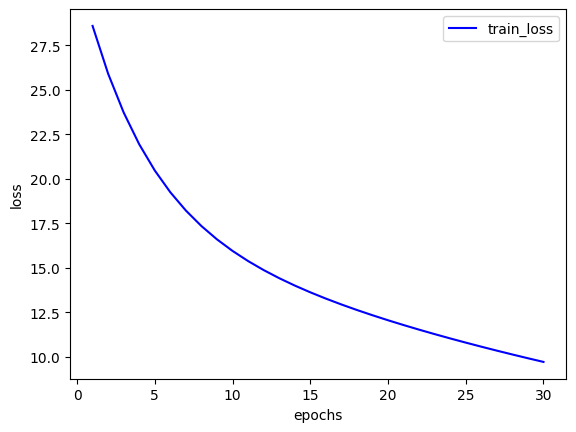

In [6]:
import matplotlib.pyplot as plt

loss = history.history['loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color = 'blue', label = 'train_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## 예측하기

In [7]:
X_test = [[10.0]]
y_pred = model.predict(X_test)
print(y_pred)

1/1 [==============================] - 0s 84ms/step
[[24.713173]]


## 가중치의 출력

In [8]:
w, b = model.get_weights()
print('w :', w)
print('b :', b)

w : [[2.280778]]
b : [1.905394]


## 예측값의 시각화

In [14]:
X = np.array([[-1.0], [0.0], [1.0], [2.0], [3.0], [4.0]])

In [15]:
y_pred = model.predict(X)
print(y_pred)

1/1 [==============================] - 0s 22ms/step
[[-0.37538397]
 [ 1.905394  ]
 [ 4.186172  ]
 [ 6.46695   ]
 [ 8.747727  ]
 [11.028505  ]]


## 시각화

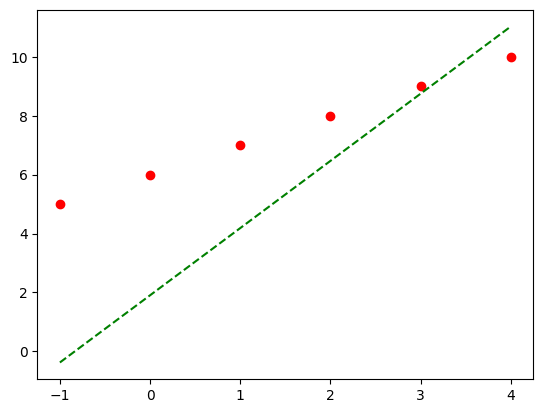

In [16]:
plt.plot(X, y, 'ro')
plt.plot(X, y_pred, 'g--')
plt.show()